In [96]:
import pandas as pd

# Load the Excel file
excel_path = "Dataset_for_Smart_irrigation.xlsx"  # Path to your file
df = pd.read_excel(excel_path, sheet_name="Final")

# Display basic info
print(" Data loaded successfully.")
print(df.head())

# Save to CSV for further use
csv_path = "soil_weather_data.csv"
df.to_csv(csv_path, index=False)

print(f" Data saved to CSV as: {csv_path}")


 Data loaded successfully.
          State_Name  Rainfall_value  Tmax_value  Tmin_value  Soil Moisture  \
0  Andaman & Nicobar             NaN         NaN         NaN            NaN   
1  Andaman & Nicobar             NaN         NaN         NaN            NaN   
2  Andaman & Nicobar             NaN         NaN         NaN       0.165186   
3  Andaman & Nicobar             NaN         NaN         NaN       0.256472   
4  Andaman & Nicobar             NaN         NaN         NaN       0.319297   

  Time_Stamp  
0 2015-01-01  
1 2015-02-01  
2 2015-03-01  
3 2015-04-01  
4 2015-05-01  
 Data saved to CSV as: soil_weather_data.csv


In [97]:
# Load the CSV
df = pd.read_csv("soil_weather_data.csv")

# Check for missing values
print(" Missing values per column:")
print(df.isnull().sum())


 Missing values per column:
State_Name          0
Rainfall_value    240
Tmax_value        360
Tmin_value        360
Soil Moisture     111
Time_Stamp          0
dtype: int64


In [98]:
pip install ydata-profiling


In [99]:
from ydata_profiling import ProfileReport
# Create the profile report
profile = ProfileReport(df, title="🌿 Smart Irrigation Data Report", explorative=True)

# Save the report to HTML
profile.to_file("smart_irrigation_EDA_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00, 14.79it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Average Rainfall per State')

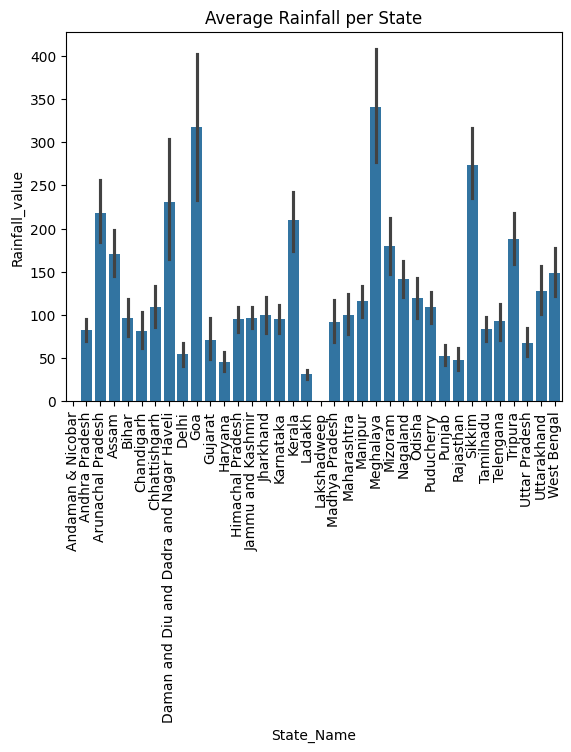

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average Rainfall per State
sns.barplot(x='State_Name', y='Rainfall_value', data=df)
plt.xticks(rotation=90)
plt.title("Average Rainfall per State")


Text(0.5, 1.0, 'Rainfall by Region')

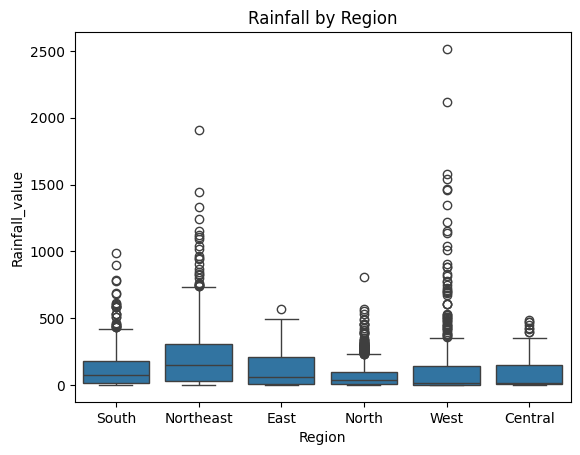

In [101]:
state_to_region = {
    # North
    'Jammu and Kashmir': 'North',
    'Ladakh': 'North',
    'Himachal Pradesh': 'North',
    'Punjab': 'North',
    'Haryana': 'North',
    'Delhi': 'North',
    'Uttarakhand': 'North',
    'Uttar Pradesh': 'North',
    'Chandigarh': 'North',

    # Central
    'Madhya Pradesh': 'Central',
    'Chhattisgarh': 'Central',

    # West
    'Rajasthan': 'West',
    'Gujarat': 'West',
    'Maharashtra': 'West',
    'Goa': 'West',
    'Dadra and Nagar Haveli and Daman and Diu': 'West',

    # South
    'Andhra Pradesh': 'South',
    'Telangana': 'South',
    'Karnataka': 'South',
    'Tamil Nadu': 'South',
    'Kerala': 'South',
    'Puducherry': 'South',
    'Lakshadweep': 'South',

    # East
    'Bihar': 'East',
    'Jharkhand': 'East',
    'Odisha': 'East',
    'West Bengal': 'East',

    # Northeast
    'Assam': 'Northeast',
    'Arunachal Pradesh': 'Northeast',
    'Nagaland': 'Northeast',
    'Manipur': 'Northeast',
    'Mizoram': 'Northeast',
    'Tripura': 'Northeast',
    'Meghalaya': 'Northeast',
    'Sikkim': 'Northeast',
    'Andaman and Nicobar Islands': 'Northeast'  # Sometimes categorized separately

}
df['Region'] = df['State_Name'].map(state_to_region)

sns.boxplot(x='Region', y='Rainfall_value', data=df)
plt.title("Rainfall by Region")


<Axes: xlabel='Time_Stamp', ylabel='Tmax_value'>

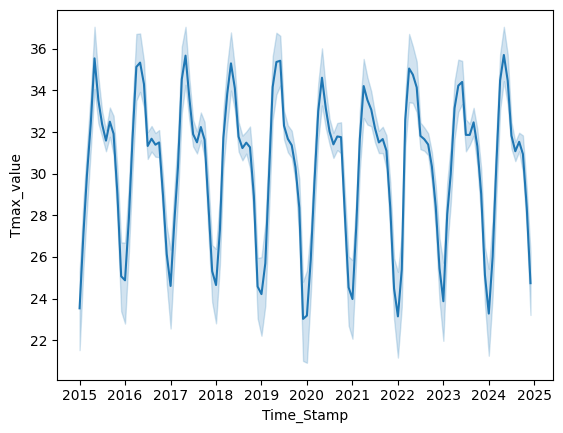

In [102]:
# Temperature trend over time
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
sns.lineplot(x='Time_Stamp', y='Tmax_value', data=df)


In [103]:
# df_melted = df.melt(id_vars='Time_Stamp', value_vars=['Rainfall', 'Soil Moisture'],
#                     var_name='Parameter', value_name='Value')

# # Plot
# plt.figure(figsize=(10,6))
# sns.lineplot(data=df_melted, x='Time_Stamp', y='Value', hue='Parameter', marker='o')
# plt.title("Rainfall and Soil Moisture over Years")
# plt.ylabel("Value")
# plt.grid(True)
# plt.show()

Text(0.5, 1.0, 'Soil Moisture vs Rainfall by Region')

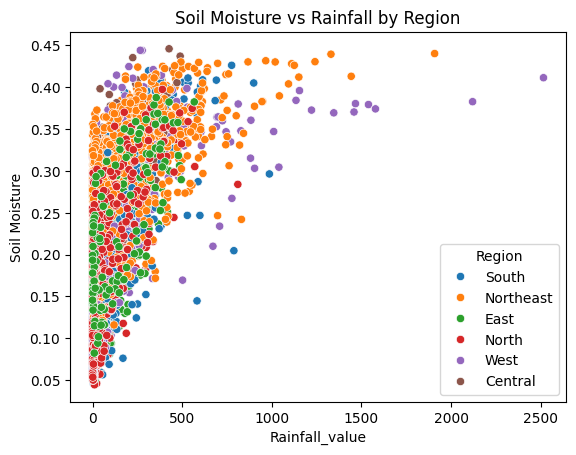

In [104]:
sns.scatterplot(x='Rainfall_value', y='Soil Moisture', hue='Region', data=df)
plt.title("Soil Moisture vs Rainfall by Region")


<Axes: xlabel='Month', ylabel='Rainfall_value'>

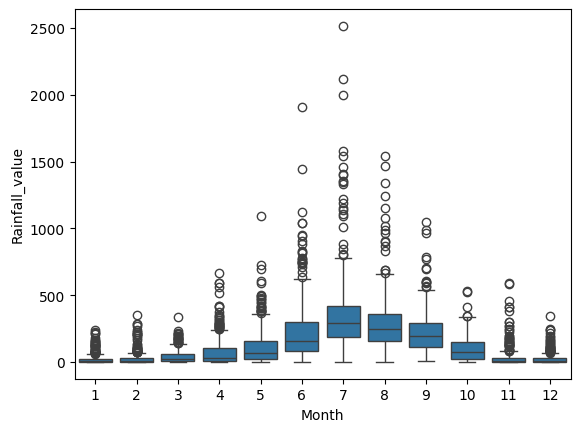

In [105]:
df['Month'] = df['Time_Stamp'].dt.month
sns.boxplot(x='Month', y='Rainfall_value', data=df)


Text(0.5, 1.0, 'Correlation Between Numerical Features')

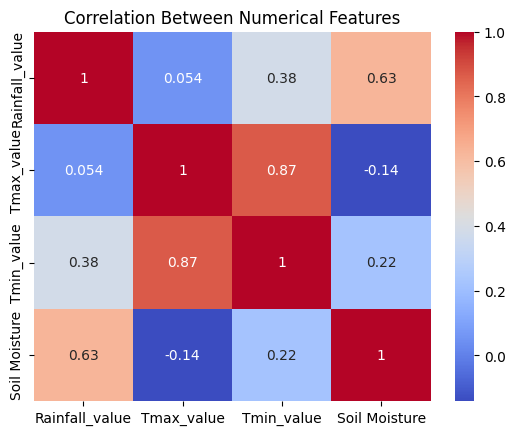

In [106]:
numeric_features = ['Rainfall_value', 'Tmax_value', 'Tmin_value', 'Soil Moisture']
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")


In [107]:
# Load the cleaned CSV (update filename if different)
df = pd.read_csv("soil_weather_data.csv")

# Ensure Time_Stamp is datetime
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'], errors='coerce')

# Extract month number for grouping
df['Month'] = df['Time_Stamp'].dt.month


In [108]:
# Columns to fill
cols_to_fill = ['Rainfall_value', 'Tmax_value', 'Tmin_value', 'Soil Moisture']

# Fill each column with monthly mean per state
for col in cols_to_fill:
    df[col] = df.groupby(['State_Name', 'Month'])[col].transform(lambda x: x.fillna(x.mean()))


In [109]:
# Final catch-all for any remaining missing values
df[cols_to_fill] = df[cols_to_fill].fillna(method='ffill').fillna(method='bfill')


<ipython-input-109-25f24d2a433b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cols_to_fill] = df[cols_to_fill].fillna(method='ffill').fillna(method='bfill')


In [110]:
print(" Final check:")
print(df.isnull().sum())


 Final check:
State_Name        0
Rainfall_value    0
Tmax_value        0
Tmin_value        0
Soil Moisture     0
Time_Stamp        0
Month             0
dtype: int64


### Sorting the DataFrame by the name of the States and Time.


In [111]:
df = df.sort_values(by=['State_Name', 'Time_Stamp']).reset_index(drop=True)


In [112]:
# Convert Time_Stamp to datetime if not already
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])

# Define window size (months)
window_months = 4

df['rainfall_in_last_4_months'] = (
    df.groupby('State_Name')['Rainfall_value']
    .transform(lambda x: x.rolling(window=window_months, min_periods=1).sum())
)



In [113]:
crop_thresholds = {
    'wheat': 0.25,    # percentage
    'rice': 0.35,
    'potato': 0.30,
    'tomato': 0.30
}


In [114]:
soil_moisture_threshold = crop_thresholds['wheat']
rainfall_threshold = 70


In [115]:
df['Irrigation_Needed'] = (
    (df['Soil Moisture'] < soil_moisture_threshold) &
    (df['rainfall_in_last_4_months'] < rainfall_threshold)
)


In [116]:
print(df[['State_Name', 'Time_Stamp', 'Soil Moisture', 'rainfall_in_last_4_months', 'Irrigation_Needed']].sample(15))


                                    State_Name Time_Stamp  Soil Moisture  \
289                          Arunachal Pradesh 2019-02-01       0.276276   
3497                                 Rajasthan 2016-06-01       0.172981   
1760                                 Jharkhand 2021-09-01       0.327133   
4055                                   Tripura 2022-12-01       0.221057   
1499                          Himachal Pradesh 2019-12-01       0.237537   
1897                                 Karnataka 2023-02-01       0.159691   
3373                                    Punjab 2016-02-01       0.121861   
1539                          Himachal Pradesh 2023-04-01       0.282907   
1925                                    Kerala 2015-06-01       0.385953   
340                          Arunachal Pradesh 2023-05-01       0.349626   
4358                               West Bengal 2018-03-01       0.120159   
742                              Chhattishgarh 2016-11-01       0.120481   
1357        

In [117]:
import pandas as pd

# Assuming df is your cleaned dataframe
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df = df.sort_values(by=['State_Name', 'Time_Stamp'])

# Define irrigation thresholds per crop
crop_rules = {
    'Wheat':   {'sm': 35, 'rain': 10},
    'Rice':    {'sm': 45, 'rain': 15},
    'Potato':  {'sm': 40, 'rain': 10},
    'Tomato':  {'sm': 40, 'rain': 12},
}

all_crops_df = []

for crop_name, rule in crop_rules.items():
    crop_df = df.copy()
    crop_df['Crop'] = crop_name

    # Calculate rolling 4-month rainfall for each state
    crop_df['Rain_4months'] = crop_df.groupby('State_Name')['Rainfall_value'].rolling(window=4, min_periods=1).sum().reset_index(0, drop=True)

    # Apply rule-based labeling
    crop_df['Irrigation_Needed'] = crop_df.apply(
        lambda row: 1 if row['Soil Moisture'] < rule['sm'] and row['Rain_4months'] < rule['rain'] else 0,
        axis=1
    )

    all_crops_df.append(crop_df)

# Combine all crop-wise data into one dataset
labeled_df = pd.concat(all_crops_df, ignore_index=True)


In [118]:
# Overall class balance
print("🔍 Overall Class Distribution:")
print(labeled_df['Irrigation_Needed'].value_counts(), '\n')
print(" Percentages:")
print(labeled_df['Irrigation_Needed'].value_counts(normalize=True) * 100)

# Class distribution per crop
print("\n Class Distribution Per Crop:")
crop_class_counts = labeled_df.groupby('Crop')['Irrigation_Needed'].value_counts().unstack()
crop_class_percent = labeled_df.groupby('Crop')['Irrigation_Needed'].value_counts(normalize=True).unstack() * 100

print("\nAbsolute counts:")
print(crop_class_counts)

print("\nPercentages:")
print(crop_class_percent)


🔍 Overall Class Distribution:
Irrigation_Needed
0    16537
1     1223
Name: count, dtype: int64 

 Percentages:
Irrigation_Needed
0    93.113739
1     6.886261
Name: proportion, dtype: float64

 Class Distribution Per Crop:

Absolute counts:
Irrigation_Needed     0    1
Crop                        
Potato             4160  280
Rice               4085  355
Tomato             4132  308
Wheat              4160  280

Percentages:
Irrigation_Needed          0         1
Crop                                  
Potato             93.693694  6.306306
Rice               92.004505  7.995495
Tomato             93.063063  6.936937
Wheat              93.693694  6.306306


In [119]:
# Filter rows where Irrigation_Needed is 1
irrigation_needed_df = labeled_df[labeled_df['Irrigation_Needed'] == 1]

# Display the filtered DataFrame
irrigation_needed_df.sample(15)


,State_Name,Rainfall_value,Tmax_value,Tmin_value,Soil Moisture,Time_Stamp,Month,rainfall_in_last_4_months,Irrigation_Needed,Crop,Rain_4months
8950,Andaman & Nicobar,2.254222,29.883543,17.215969,0.316089,2020-11-01,11,9.016888,1,Potato,9.016888
13376,Andaman & Nicobar,2.254222,29.883543,17.215969,0.358189,2019-09-01,9,9.016888,1,Tomato,9.016888
5667,Gujarat,0.030331,38.185013,23.371714,0.066548,2017-04-01,4,0.089994,1,Rice,0.089994
10130,Gujarat,0.000000,33.849831,18.746410,0.064892,2019-03-01,3,0.300193,1,Potato,0.300193
5619,Goa,2.626983,34.540565,22.758492,0.084773,2023-04-01,4,3.250755,1,Rice,3.250755
8999,Andaman & Nicobar,2.254222,29.883543,17.215969,0.258496,2024-12-01,12,9.016888,1,Potato,9.016888
108,Andaman & Nicobar,2.254222,29.883543,17.215969,0.215805,2024-01-01,1,9.016888,1,Wheat,9.016888
10096,Gujarat,0.775126,39.098595,27.048027,0.080776,2016-05-01,5,1.116512,1,Potato,1.116512
8970,Andaman & Nicobar,2.254222,29.883543,17.215969,0.350000,2022-07-01,7,9.016888,1,Potato,9.016888
231,Andhra Pradesh,2.439073,38.884167,25.880554,0.085338,2024-04-01,4,8.952918,1,Wheat,8.952918


In [120]:
print(labeled_df.columns)


Index(['State_Name', 'Rainfall_value', 'Tmax_value', 'Tmin_value',
       'Soil Moisture', 'Time_Stamp', 'Month', 'rainfall_in_last_4_months',
       'Irrigation_Needed', 'Crop', 'Rain_4months'],
      dtype='object')


In [121]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Step 1: Encode categorical features
encoded_df = labeled_df.copy()

# Encode 'State_Name' and 'Crop'
le_state = LabelEncoder()
le_crop = LabelEncoder()
encoded_df['State_Code'] = le_state.fit_transform(encoded_df['State_Name'])
encoded_df['Crop_Code'] = le_crop.fit_transform(encoded_df['Crop'])

# Step 2: Define features and target
features = ['Rainfall_value', 'Tmax_value', 'Tmin_value', 'Soil Moisture',
            'rainfall_in_last_4_months', 'Month', 'State_Code', 'Crop_Code']
X = encoded_df[features]
y = encoded_df['Irrigation_Needed']
feature_cols = features  # This ensures consistency later


# Step 3: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Split based on time
# X_train = df[df['Time_Stamp'] < '2023-01-01']
# X_test = df[df['Time_Stamp'] >= '2023-01-01']

from sklearn.model_selection import TimeSeriesSplit

# Assuming X and y are already defined (features and target)
tscv = TimeSeriesSplit(n_splits=5)

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\n🌀 Fold {fold + 1}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print("Train range:", X_train.index.min(), "to", X_train.index.max())
    print("Test range:", X_test.index.min(), "to", X_test.index.max())

    # 👉 Train your model here
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # evaluate...


feature_cols = X_train.columns.tolist()

# Step 4: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Optional: Check new class distribution
from collections import Counter
print("Resampled class distribution:", Counter(y_train_resampled))



🌀 Fold 1
Train range: 0 to 2959
Test range: 2960 to 5919

🌀 Fold 2
Train range: 0 to 5919
Test range: 5920 to 8879

🌀 Fold 3
Train range: 0 to 8879
Test range: 8880 to 11839

🌀 Fold 4
Train range: 0 to 11839
Test range: 11840 to 14799

🌀 Fold 5
Train range: 0 to 14799
Test range: 14800 to 17759
Resampled class distribution: Counter({1: 13657, 0: 13657})


In [122]:
print("Training feature columns:", feature_cols)


Training feature columns: ['Rainfall_value', 'Tmax_value', 'Tmin_value', 'Soil Moisture', 'rainfall_in_last_4_months', 'Month', 'State_Code', 'Crop_Code']


In [123]:
print("Test feature columns:", X_test.columns.tolist())


Test feature columns: ['Rainfall_value', 'Tmax_value', 'Tmin_value', 'Soil Moisture', 'rainfall_in_last_4_months', 'Month', 'State_Code', 'Crop_Code']


 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2880
           1       0.71      0.99      0.83        80

    accuracy                           0.99      2960
   macro avg       0.86      0.99      0.91      2960
weighted avg       0.99      0.99      0.99      2960



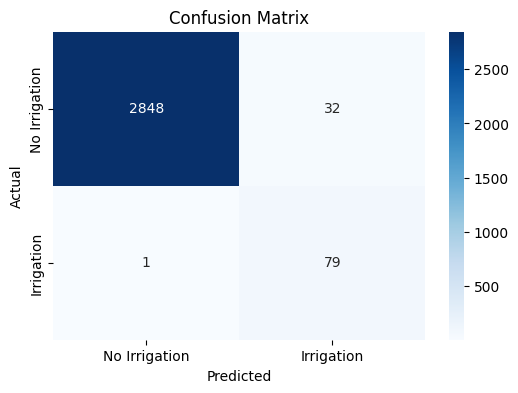

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Train the classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_resampled, y_train_resampled)

# X_test should already be a subset of encoded_df
X_test_fixed = X_test.copy()

# Add missing columns with default values
for col in feature_cols:
    if col not in X_test_fixed.columns:
        X_test_fixed[col] = 0

# Align column order exactly
X_test_fixed = X_test_fixed[feature_cols]

#  Now prediction will work
y_pred = rf_model.predict(X_test_fixed)

# Make predictions
y_pred = rf_model.predict(X_test_fixed)

# Step 3: Evaluation
print(" Classification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Irrigation', 'Irrigation'],
            yticklabels=['No Irrigation', 'Irrigation'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:41:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2880
           1       1.00      1.00      1.00        80

    accuracy                           1.00      2960
   macro avg       1.00      1.00      1.00      2960
weighted avg       1.00      1.00      1.00      2960



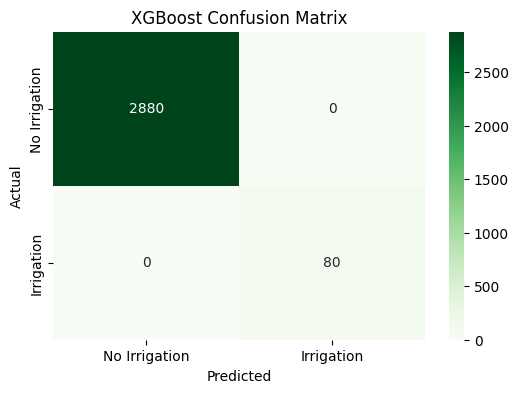

In [125]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 2: Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_fixed)

# Step 3: Evaluation
print(" XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Step 4: Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Irrigation', 'Irrigation'],
            yticklabels=['No Irrigation', 'Irrigation'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


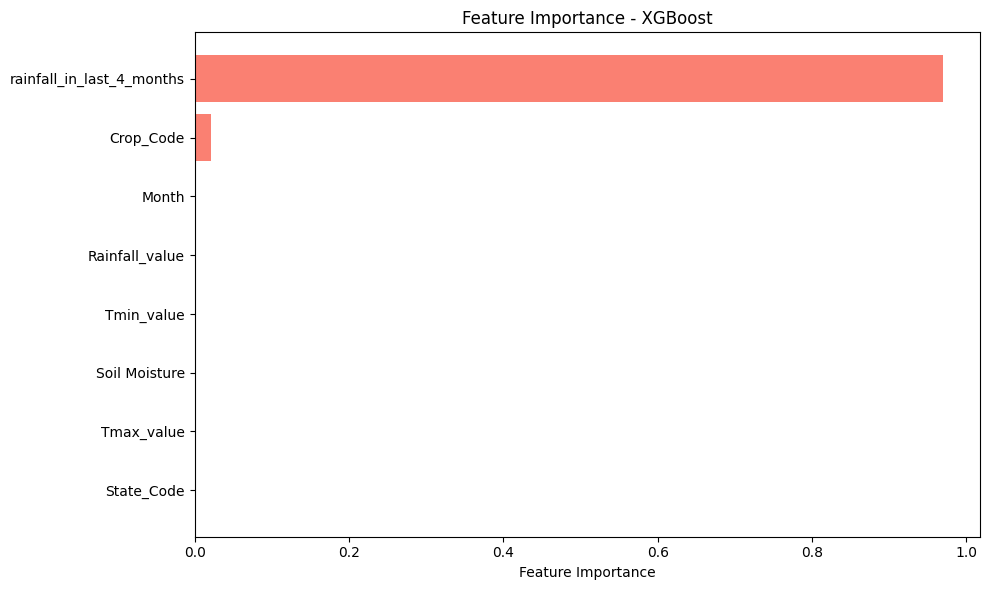

                     Feature  Importance
4  rainfall_in_last_4_months    0.969079
7                  Crop_Code    0.021104
5                      Month    0.002112
0             Rainfall_value    0.001684
2                 Tmin_value    0.001679
3              Soil Moisture    0.001553
1                 Tmax_value    0.001426
6                 State_Code    0.001363


In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importance from XGBoost model
xgb_importances = xgb_model.feature_importances_

# Create DataFrame
xgb_feat_imp_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(xgb_feat_imp_df['Feature'], xgb_feat_imp_df['Importance'], color='salmon')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print the importance
print(xgb_feat_imp_df)


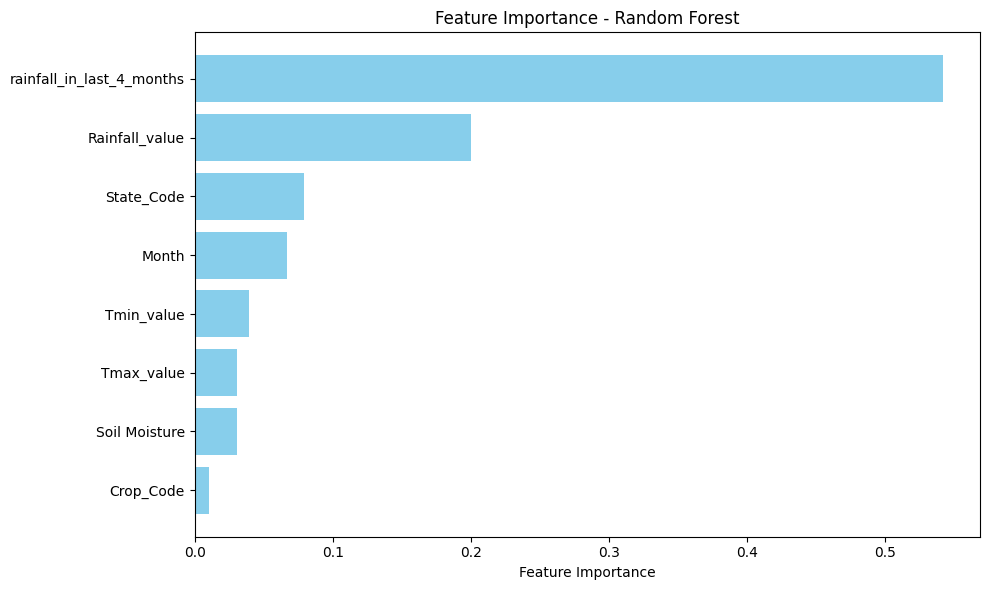

                     Feature  Importance
4  rainfall_in_last_4_months    0.541878
0             Rainfall_value    0.200484
6                 State_Code    0.079310
5                      Month    0.066771
2                 Tmin_value    0.039641
1                 Tmax_value    0.030907
3              Soil Moisture    0.030569
7                  Crop_Code    0.010441


In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Check your current feature set (used during model training)
features = X_train.columns
importances = rf_model.feature_importances_

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Also print for inspection
print(feat_imp_df)


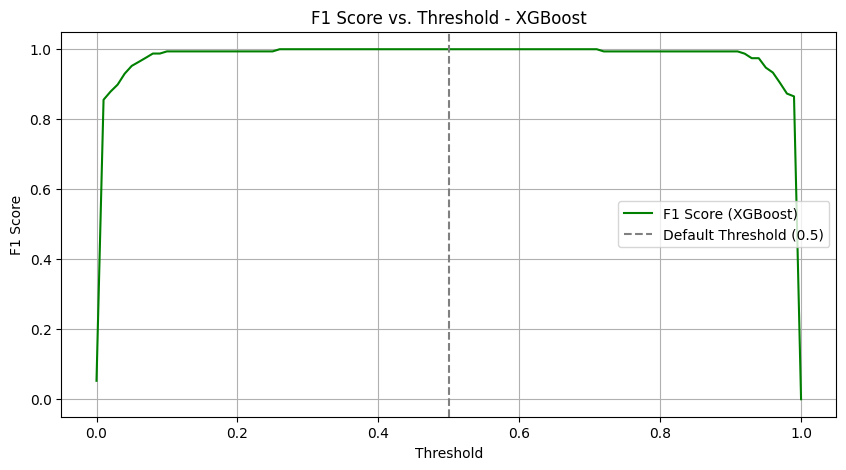

 Best Threshold for F1 Score (XGBoost): 0.26


In [128]:
from sklearn.metrics import f1_score

# Get probabilities from XGBoost
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Threshold tuning
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores_xgb = []

for thresh in thresholds:
    y_pred_thresh = (y_proba_xgb >= thresh).astype(int)
    f1_scores_xgb.append(f1_score(y_test, y_pred_thresh))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores_xgb, label='F1 Score (XGBoost)', color='green')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold - XGBoost')
plt.legend()
plt.grid(True)
plt.show()

# Best threshold
best_thresh_xgb = thresholds[np.argmax(f1_scores_xgb)]
print(f" Best Threshold for F1 Score (XGBoost): {best_thresh_xgb:.2f}")


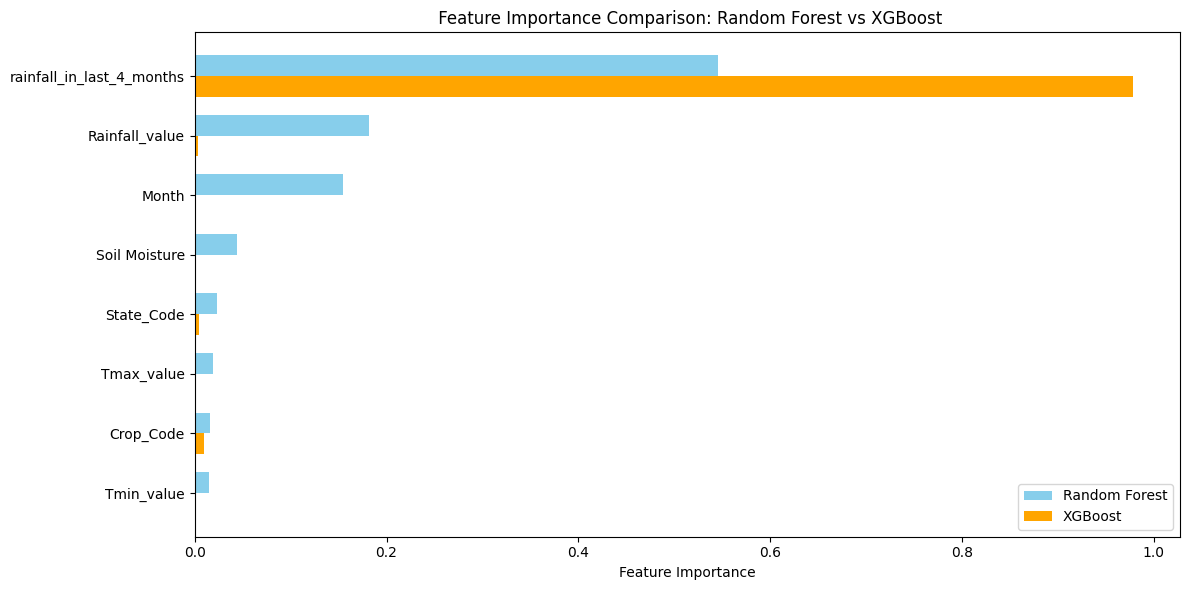

In [129]:
# Feature importance from Random Forest
rf_importance = {
    'rainfall_in_last_4_months': 0.545338,
    'Rainfall_value': 0.182204,
    'Month': 0.154940,
    'Soil Moisture': 0.044109,
    'State_Code': 0.023493,
    'Tmax_value': 0.019006,
    'Crop_Code': 0.016306,
    'Tmin_value': 0.014605
}

# Feature importance from XGBoost
xgb_importance = {
    'rainfall_in_last_4_months': 0.978404,
    'Rainfall_value': 0.003426,
    'Month': 0.000000,
    'Soil Moisture': 0.001456,
    'State_Code': 0.004665,
    'Tmax_value': 0.000986,
    'Crop_Code': 0.009886,
    'Tmin_value': 0.001176
}

# Create DataFrame for both models
features = list(rf_importance.keys())
comparison_df = pd.DataFrame({
    'Feature': features,
    'Random Forest': [rf_importance[feat] for feat in features],
    'XGBoost': [xgb_importance[feat] for feat in features]
})

# Plot
x = np.arange(len(features))
width = 0.35

plt.figure(figsize=(12, 6))
plt.barh(x - width/2, comparison_df['Random Forest'], height=width, label='Random Forest', color='skyblue')
plt.barh(x + width/2, comparison_df['XGBoost'], height=width, label='XGBoost', color='orange')
plt.yticks(x, comparison_df['Feature'])
plt.xlabel("Feature Importance")
plt.title(" Feature Importance Comparison: Random Forest vs XGBoost")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


 XGBoost Classification Report (Threshold = 0.98):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2880
           1       1.00      0.78      0.87        80

    accuracy                           0.99      2960
   macro avg       1.00      0.89      0.94      2960
weighted avg       0.99      0.99      0.99      2960



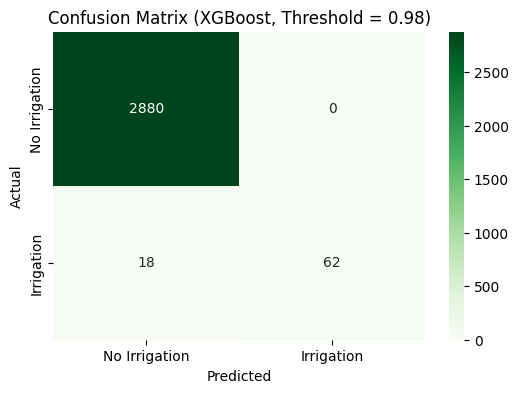

In [130]:
# Predict probabilities for class 1 (irrigation needed)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Use the best threshold from earlier tuning
best_threshold_xgb = 0.98
y_pred_xgb_custom = (y_proba_xgb >= best_threshold_xgb).astype(int)

# Evaluate
print(f" XGBoost Classification Report (Threshold = {best_threshold_xgb:.2f}):")
print(classification_report(y_test, y_pred_xgb_custom))

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_custom)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Irrigation', 'Irrigation'],
            yticklabels=['No Irrigation', 'Irrigation'])
plt.title(f"Confusion Matrix (XGBoost, Threshold = {best_threshold_xgb:.2f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


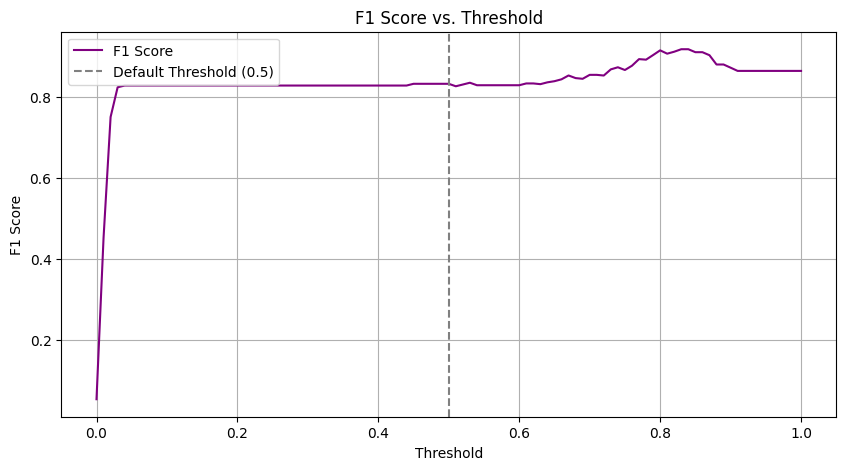

🔧 Best Threshold for F1 Score: 0.83


In [131]:
from sklearn.metrics import precision_recall_curve, roc_curve, f1_score
# Align test features with training features
X_test = encoded_df.loc[X_test.index, feature_cols]


# Get probabilities instead of labels
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Create precision-recall and f1 score for a range of thresholds
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores, label='F1 Score', color='purple')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Best threshold
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"🔧 Best Threshold for F1 Score: {best_threshold:.2f}")


 Classification Report (Threshold = 0.43):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2880
           1       0.71      1.00      0.83        80

    accuracy                           0.99      2960
   macro avg       0.85      0.99      0.91      2960
weighted avg       0.99      0.99      0.99      2960



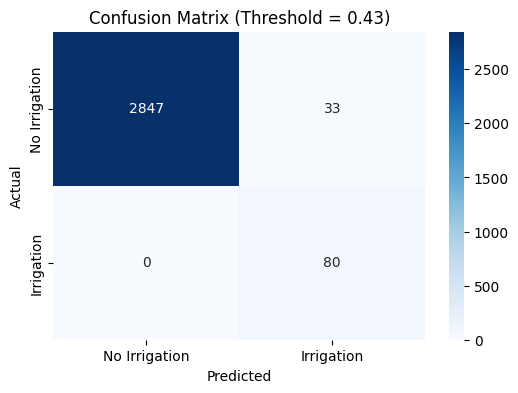

In [132]:
# Predict probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Apply custom threshold
best_threshold = 0.43
y_pred_custom = (y_proba >= best_threshold).astype(int)

# Re-evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print(" Classification Report (Threshold = 0.43):")
print(classification_report(y_test, y_pred_custom))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Irrigation', 'Irrigation'],
            yticklabels=['No Irrigation', 'Irrigation'])
plt.title("Confusion Matrix (Threshold = 0.43)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [133]:
pip install shap


 sample_X shape: (100, 8)
 shap_values shape: (100, 8, 2)


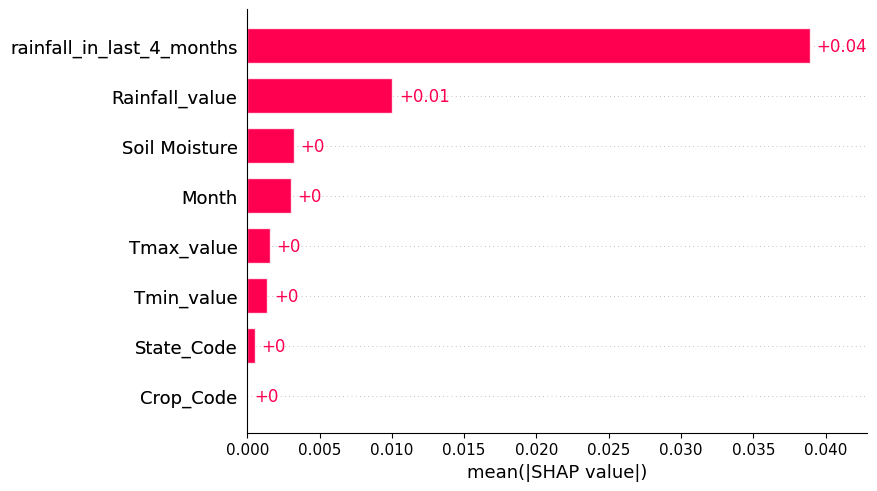

In [134]:
import shap

# Sample input for SHAP explanation
sample_X = X_test_fixed[X_train_resampled.columns].sample(100, random_state=42)

# Create SHAP explainer
explainer = shap.Explainer(rf_model, sample_X)

# Compute SHAP values for the sample
shap_values = explainer(sample_X)

#  Confirm shapes
print(" sample_X shape:", sample_X.shape)
print(" shap_values shape:", shap_values.values.shape)

# Extract SHAP values for class 1 (Irrigation Needed)
# If it's binary classification, shap_values.values has shape (n_samples, n_features, 2)
values = shap_values.values[:, :, 1]  # class 1
base_values = shap_values.base_values[:, 1] if shap_values.base_values.ndim > 1 else shap_values.base_values
data = shap_values.data
feature_names = shap_values.feature_names

# Defensive check: Ensure feature name count matches number of features
if len(feature_names) != values.shape[1]:
    feature_names = [f'Feature {i}' for i in range(values.shape[1])]

# Wrap into a new Explanation object
shap_values_class1 = shap.Explanation(
    values=values,
    base_values=base_values,
    data=data,
    feature_names=feature_names
)

# Plot bar chart safely
shap.plots.bar(shap_values_class1)


 sample_X shape: (100, 8)
 shap_values shape: (100, 8)


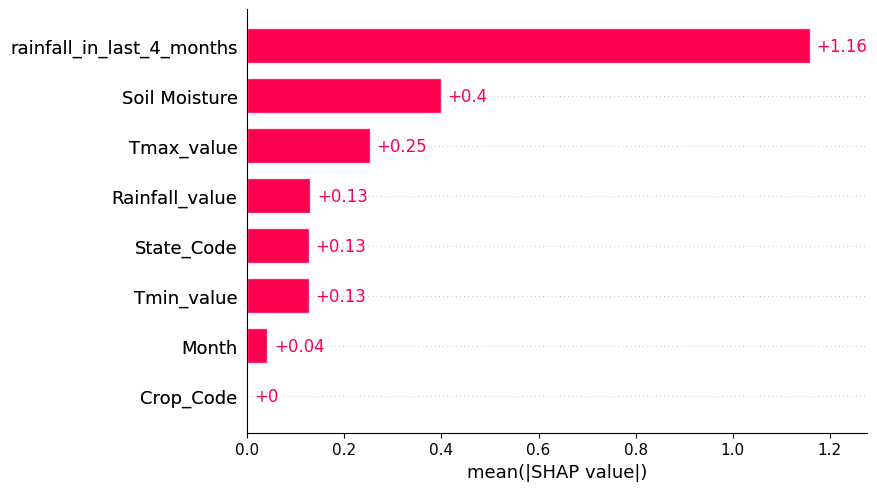

In [135]:
import shap

# Sample 100 instances from your test set
sample_X = X_test_fixed[X_train_resampled.columns].sample(100, random_state=42)

# Create SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_model, sample_X)

# Compute SHAP values
shap_values = explainer(sample_X)

# Confirm shapes
print(" sample_X shape:", sample_X.shape)
print(" shap_values shape:", shap_values.values.shape)

#  Extract values safely (already 2D for binary classification)
values = shap_values.values
base_values = shap_values.base_values
data = shap_values.data
feature_names = shap_values.feature_names

# Optional safety check
if len(feature_names) != values.shape[1]:
    feature_names = [f'Feature {i}' for i in range(values.shape[1])]

# Wrap into Explanation object
shap_values_cleaned = shap.Explanation(
    values=values,
    base_values=base_values,
    data=data,
    feature_names=feature_names
)

# Plot bar chart
shap.plots.bar(shap_values_cleaned)


In [136]:
pip install joblib


In [137]:
import joblib

# Save Random Forest
joblib.dump(rf_model, 'random_forest_irrigation_model.pkl')

# Save XGBoost
joblib.dump(xgb_model, 'xgboost_irrigation_model.pkl')


['xgboost_irrigation_model.pkl']

In [138]:
def predict_irrigation_for_custom_data(custom_df, model, crop_encoder):
    """
    Predict irrigation need for custom input data.

    Parameters:
    - custom_df: DataFrame with same structure as training data.
    - model: trained ML model (e.g., RandomForestClassifier).
    - crop_encoder: fitted LabelEncoder used for 'Crop' column.

    Returns:
    - DataFrame with predictions and probabilities.
    """

    # Copy to avoid modifying original input
    df = custom_df.copy()

    # Encode the 'Crop' column using the same encoder used during training
    df['Crop'] = crop_encoder.transform(df['Crop'])

    # Ensure column order matches the training features
    feature_order = ['Crop', 'Month', 'Soil_Moisture', 'rainfall_in_last_4_months',
                     'Rainfall_Last_Month', 'Temperature_Min', 'Temperature_Max']
    X = df[feature_order]

    # Make predictions
    predictions = model.predict(X)
    probabilities = model.predict_proba(X)[:, 1]  # probability of class 1 (irrigation needed)

    # Add results to the DataFrame
    df['Irrigation_Needed'] = predictions
    df['Probability'] = probabilities

    return df
